# 預測圖書館報名人數

## import

In [2]:
# import pandas
import pandas as pd
from datetime import datetime
from dateutil import parser

In [3]:
# 圖形相關
%matplotlib inline
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'NotoSerifCJKtc-Black.otf')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=myfont.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

## 讀取檔案

In [4]:
library = pd.read_excel('library20181022.xlsx')
library.head(2)

,tag1,tag2,課程編號,主題,講者,開始時間,結束時間,總計分鐘數,地點,適合對象,限制人數,已報名人數,已爆滿,描述,講義檔案名稱,講義網址,網址
0,基礎課程,講座,SP_103-2-0721(3),以Turnitin自我檢測論文內容之原創性,邱稚婷小姐 (智泉國際),2015-07-21T09:00:00+08:00,2015-07-21T10:00:00+08:00,60.0,圖書館三樓資訊素養教室,全校師生、中部聯盟學校師生,60.0,10.0,0.0,NaN,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...
1,基礎課程,講座,SP_103-2-0720(2),不可不知的學位論文著作權,麥智德副理 (連邦國際專利商標事務所 ),2015-07-20T13:30:00+08:00,2015-07-20T15:30:00+08:00,120.0,圖書館三樓資訊素養教室,全校師生、中部聯盟學校師生,60.0,7.0,0.0,NaN,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...


In [5]:
# 檔案大小
library.shape

(414, 17)

In [6]:
# 描述性統計
library.describe(include='all')

,tag1,tag2,課程編號,主題,講者,開始時間,結束時間,總計分鐘數,地點,適合對象,限制人數,已報名人數,已爆滿,描述,講義檔案名稱,講義網址,網址
count,414,414,414,414,414,414,414,246.000000,411,414,374.000000,374.000000,374.000000,336,12,34,414
unique,1,6,404,376,184,405,406,NaN,6,37,NaN,NaN,NaN,291,9,34,414
top,基礎課程,資訊素養研習(電子資源),IL_105-2-0309,逢甲大學學位論文提交說明,學院服務館員,2016-09-26T15:10:00+08:00,2016-09-22T16:00:00+08:00,NaN,圖書館二樓資訊素養教室,全校師生,NaN,NaN,NaN,逢甲新鮮人不可錯過的資訊素養課程，圖書館可用的資源及服務，一次說明白。,書目管理軟體Zotero簡易操作手冊.pdf,http://web.lib.fcu.edu.tw/ilworkshop/sites/web...,http://web.lib.fcu.edu.tw//ilworkshop/workshop...
freq,414,250,2,6,19,2,2,NaN,283,337,NaN,NaN,NaN,8,3,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.853659,NaN,NaN,49.521390,17.935829,0.195187,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.843962,NaN,NaN,24.391651,16.521045,0.396876,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,40.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,NaN,NaN,45.000000,14.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.000000,NaN,NaN,60.000000,30.000000,0.000000,NaN,NaN,NaN,NaN


In [7]:
library.describe()

,總計分鐘數,限制人數,已報名人數,已爆滿
count,246.000000,374.000000,374.000000,374.000000
mean,117.853659,49.521390,17.935829,0.195187
std,78.843962,24.391651,16.521045,0.396876
min,30.000000,1.000000,0.000000,0.000000
25%,60.000000,40.000000,3.000000,0.000000
50%,110.000000,45.000000,14.000000,0.000000
75%,120.000000,60.000000,30.000000,0.000000
max,420.000000,180.000000,80.000000,1.000000


## 前處理

### 處理 missing value  
03.04-Handling Missing Data  
https://github.com/jakevdp/PythonDataScienceHandbook/blob/97c8c91c5932f2b2a58bb97c000506f636ee661a/notebooks/03.04-Missing-Values.ipynb  

In [8]:
library[library['限制人數'].isnull()].head(2)

,tag1,tag2,課程編號,主題,講者,開始時間,結束時間,總計分鐘數,地點,適合對象,限制人數,已報名人數,已爆滿,描述,講義檔案名稱,講義網址,網址
9,基礎課程,線上講堂,IL_103-2-online 5,103學年度論文提交說明會,館員 蔡幸珮,2015-05-30T10:57:00+08:00,2015-09-30T10:57:00+08:00,32.0,線上課程,研究生,NaN,NaN,NaN,本課程介紹本校博碩士畢業論文繳交程序，包含論文格式審查、系統提交流程及相關注意事項。,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...
16,基礎課程,特約研習,IL_106-2-A01,圖書館資源利用課程 / Customized Library Instruction,專業館員 (Reference Librarian),2018-08-01T09:00:00+08:00,2019-07-31T17:00:00+08:00,NaN,NaN,全校師生 (Faculty and Students),NaN,NaN,NaN,※ 請於7天前提出申請。\n※ 上課人數至少5人以上。\n※ 請提供2個以上的上課日期與時間...,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...


In [9]:
library[library['限制人數'].notnull()].shape

(374, 17)

In [10]:
# 丟棄限制人數 = NaN 
library = library.dropna(subset=['限制人數'])
library.shape

(374, 17)

#### 練習  
答案 (357, 17)  
參考 https://notebooks.azure.com/fcu-liu/libraries/socialbot/html/01-python/03-panda.ipynb  

In [11]:
# 限制人數一定要大於等於 10 
library = library[library['限制人數']>=10]
library.shape

(357, 17)

### 新增報名比率  
報名比率 = 已報名人數/限制人數  

In [12]:
# 報名比率 = 已報名人數/限制人數  
library['報名比率'] = library['已報名人數']/library['限制人數']
(library['報名比率']*100).round(0).astype(int).head(2)

0    17
1    12
Name: 報名比率, dtype: int64

In [13]:
type(library.loc[0,'限制人數'])

numpy.float64

In [14]:
# 將 限制人數、已報名人數、已爆滿 設定為int
library['限制人數'] = library['限制人數'].astype(int)
library['已報名人數'] = library['已報名人數'].astype(int)
library['已爆滿'] = library['已爆滿'].astype(int)
type(library.loc[0,'限制人數'])

numpy.int64

### 設定時間格式

In [15]:
print(library.loc[0,'開始時間'])
type(library.loc[0,'開始時間'])

2015-07-21T09:00:00+08:00


str

In [16]:
# 設為時間格式
library['開始時間'] =  pd.to_datetime(library['開始時間'])
library['結束時間'] =  pd.to_datetime(library['結束時間'])
type(library.loc[0,'開始時間'])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
library = library.sort_values(by='開始時間')
library.head(2)

,tag1,tag2,課程編號,主題,講者,開始時間,結束時間,總計分鐘數,地點,適合對象,限制人數,已報名人數,已爆滿,描述,講義檔案名稱,講義網址,網址,報名比率
23,基礎課程,資訊素養研習(電子資源),1031A0918,"法商資料庫研習-Lexis.com, LexisNexis Academic",碩睿資訊 林振煌先生,2014-09-17 21:10:00,2014-09-17 23:00:00,NaN,圖書館二樓資訊素養教室,全校師生,60,0,0,介紹法學資料庫Lexis.com及法商資料庫LexisNexis Academic的內容與搜...,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...,0.0
400,基礎課程,媒體科技研習,m20140903,影片拍攝與剪輯入門,"孫藩沿, 陳浚卿",2014-09-23 20:00:00,2014-09-23 22:00:00,NaN,圖書館二樓資訊素養教室,全校師生,24,0,0,NaN,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...,0.0


### 總計分鐘數遺漏值，使用fillna

In [18]:
library[library['總計分鐘數'].isnull()].head(2)

,tag1,tag2,課程編號,主題,講者,開始時間,結束時間,總計分鐘數,地點,適合對象,限制人數,已報名人數,已爆滿,描述,講義檔案名稱,講義網址,網址,報名比率
23,基礎課程,資訊素養研習(電子資源),1031A0918,"法商資料庫研習-Lexis.com, LexisNexis Academic",碩睿資訊 林振煌先生,2014-09-17 21:10:00,2014-09-17 23:00:00,NaN,圖書館二樓資訊素養教室,全校師生,60,0,0,介紹法學資料庫Lexis.com及法商資料庫LexisNexis Academic的內容與搜...,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...,0.0
400,基礎課程,媒體科技研習,m20140903,影片拍攝與剪輯入門,"孫藩沿, 陳浚卿",2014-09-23 20:00:00,2014-09-23 22:00:00,NaN,圖書館二樓資訊素養教室,全校師生,24,0,0,NaN,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...,0.0


In [19]:
# 總計分鐘數 = 結束時間 - 開始時間
# fillna
library['總計分鐘數'] = library['總計分鐘數'].fillna(
    (library['結束時間']-library['開始時間']).dt.total_seconds()/60)
library[library['總計分鐘數'].isnull()].shape

(0, 18)

In [20]:
library['總計分鐘數'] = library['總計分鐘數'].astype(int)
library['總計分鐘數'].head(2)

23     110
400    120
Name: 總計分鐘數, dtype: int64

### 地點遺缺值處理

In [21]:
# 列印多少地點遺缺值
# 答案 (2, 18)
library[library['地點'].isnull()].shape

(2, 18)

In [22]:
library[library['地點'].isnull()]

,tag1,tag2,課程編號,主題,講者,開始時間,結束時間,總計分鐘數,地點,適合對象,限制人數,已報名人數,已爆滿,描述,講義檔案名稱,講義網址,網址,報名比率
347,基礎課程,其他,MOCCS_20151007,翻轉教室之複利數學,楊菁菁老師,2015-10-07 06:00:00,2015-10-07 07:00:00,60,NaN,全校師生,60,14,0,本場次邀請本校應數系楊菁菁老師分享「複利數學」這門課程線上教材的製作與拍攝，以及線上課程與實...,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...,0.233333
104,基礎課程,資訊素養研習(電子資源),IL_106-2_0321-02,逢甲大學學位論文提交說明 (期初場),學院服務館員_林瑋琦,2018-03-21 06:10:00,2018-03-21 08:00:00,110,NaN,研究生,50,28,0,傻傻搞不清提交流程、授權書、論文格式、書背、上傳系統嗎?讓你一聽就上手的學位論文提交說明!提...,NaN,NaN,http://web.lib.fcu.edu.tw//ilworkshop/workshop...,0.560000


In [23]:
# 丟棄底點的遺缺值
# 答案 (336, 18)
library = library.dropna(subset=['地點'])
library.shape

(355, 18)

#### 不丟棄改成填值為 "無地點"

    library['地點'] = library['地點'].fillna('無地點')  
    library[library['地點'].isnull()].shape  

### 其他遺缺值檢查

In [24]:
library[library['適合對象'].isnull()].shape

(0, 18)

In [25]:
library[library['描述'].isnull()].shape

(48, 18)

# 高斯樸素貝氏預測  

05.05-Naive-Bayes.ipynb  
https://github.com/jakevdp/PythonDataScienceHandbook/blob/97c8c91c5932f2b2a58bb97c000506f636ee661a/notebooks/05.05-Naive-Bayes.ipynb

In [28]:
library.describe()

,總計分鐘數,限制人數,已報名人數,已爆滿,報名比率,dayofweek,month
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,114.591549,51.791549,18.712676,0.163380,0.409858,1.828169,7.501408
std,71.690952,22.594471,16.535588,0.370234,0.358193,1.365969,3.075670
min,40.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,60.000000,40.000000,4.000000,0.000000,0.075000,1.000000,5.000000
50%,110.000000,50.000000,15.000000,0.000000,0.300000,2.000000,9.000000
75%,135.000000,60.000000,30.000000,0.000000,0.700000,3.000000,10.000000
max,420.000000,180.000000,80.000000,1.000000,1.000000,6.000000,12.000000


## 增加變數

In [26]:
library['dayofweek'] = library['開始時間'].dt.dayofweek
library['month'] = library['開始時間'].dt.month

In [70]:
library.describe()

,總計分鐘數,限制人數,已報名人數,已爆滿,報名比率,dayofweek,month
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,114.591549,51.791549,18.712676,0.163380,0.409858,1.828169,7.501408
std,71.690952,22.594471,16.535588,0.370234,0.358193,1.365969,3.075670
min,40.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,60.000000,40.000000,4.000000,0.000000,0.075000,1.000000,5.000000
50%,110.000000,50.000000,15.000000,0.000000,0.300000,2.000000,9.000000
75%,135.000000,60.000000,30.000000,0.000000,0.700000,3.000000,10.000000
max,420.000000,180.000000,80.000000,1.000000,1.000000,6.000000,12.000000


## 訓練集與測試集

In [39]:
today = datetime.today()
previous = library[library['開始時間']<today]
future = library[library['開始時間']>=today]

train_features = previous[['總計分鐘數','限制人數','dayofweek','month']]
train_label = previous['已爆滿']


test_features = future[['總計分鐘數','限制人數','dayofweek','month']]
test_label = future['已爆滿']

In [73]:
print(train_features.head(2))
print(train_label.head(2))

     總計分鐘數  限制人數  dayofweek  month
23     110    60          2      9
400    120    24          1      9
23     0
400    0
Name: 已爆滿, dtype: int64


## GaussianNB預測

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_features,train_label)

GaussianNB(priors=None)

## 訓練集正確性

In [74]:
from sklearn import metrics
predicted_labels = model.predict(train_features)
metrics.accuracy_score(train_label, predicted_labels)

0.8367952522255193

In [75]:
metrics.confusion_matrix(train_label, predicted_labels)

array([[275,   8],
       [ 47,   7]])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


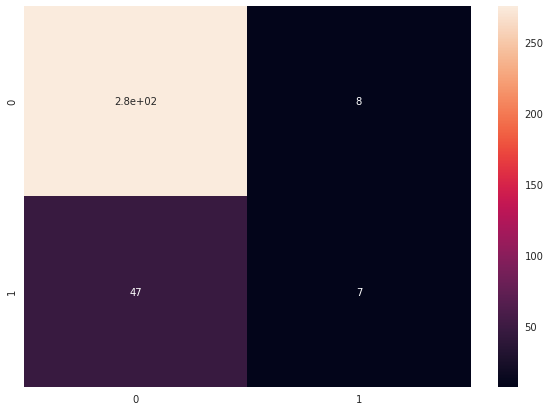

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = metrics.confusion_matrix(train_label, predicted_labels)
fig = plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.show()

## 測試集正確性

In [76]:
# predict test feature
predicted_labels = model.predict(test_features)
metrics.accuracy_score(test_label, predicted_labels)

0.7777777777777778

In [77]:
# confusion_matrix
metrics.confusion_matrix(test_label, predicted_labels)

array([[14,  0],
       [ 4,  0]])

In [82]:
test = test_features.iloc[0:2,:]
print(test)
model.predict(test)


    總計分鐘數  限制人數  dayofweek  month
36    110    50          4     10
35    170    50          4     10


array([0, 0])